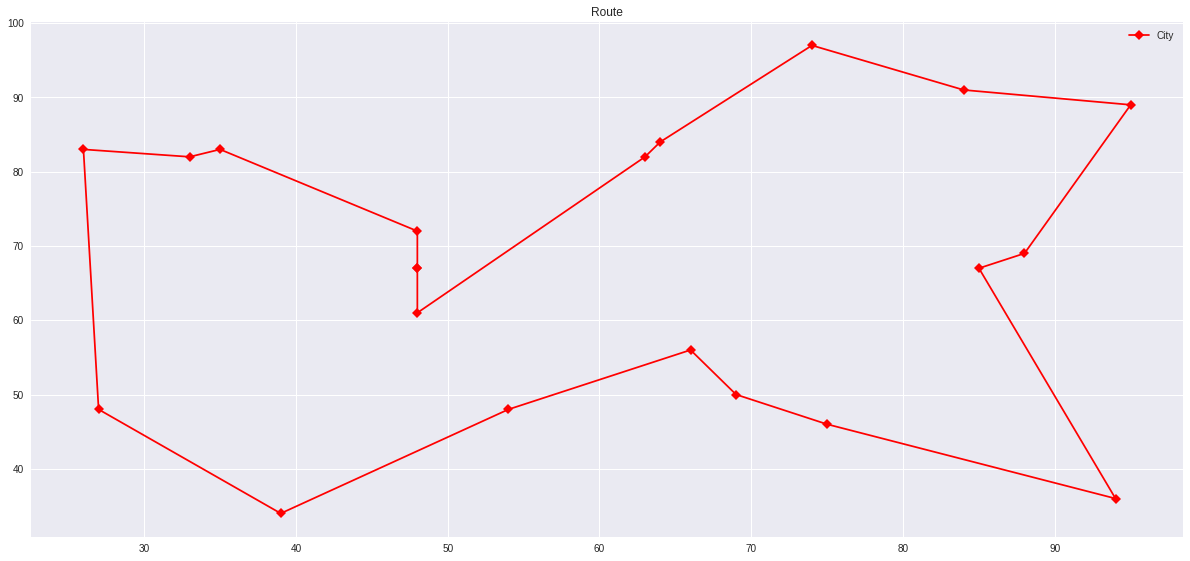

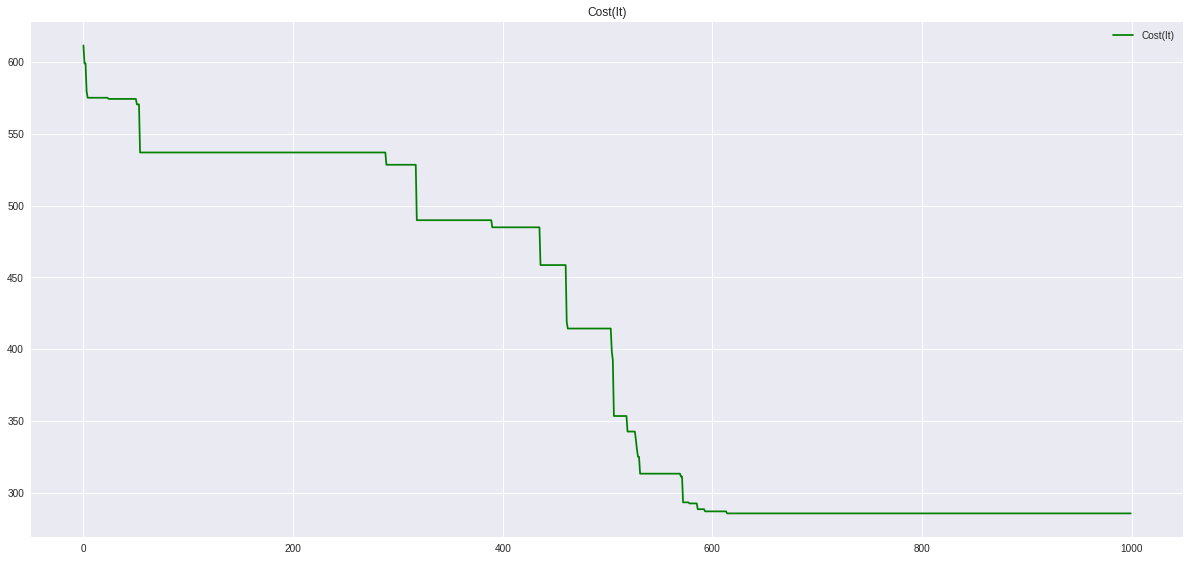

Rute Terbaik: [18  8 10  3  7 17  5 13  2 12  1  6 15 14  0 16  4  9 11 19]
Total Jarak: 285.482 km


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

#Simulated Annealing algoritma
class SA(object):
    def __init__(self,n,maxit,maxitpermtemp,T):
        self.n = n #jumlah kota
        self.maxit = maxit
        self.maxitpermtemp = maxitpermtemp
        self.x = np.random.randint(20,100,self.n)
        self.y = np.random.randint(20,100,self.n)
        self.D = np.zeros((self.n,self.n))
        self.tour = np.random.permutation(self.n)
        self.bestcost = np.zeros((self.maxit,1))
        self.T = T
        for i in range(0,self.n-1):
            for j in range(self.n):
                self.D[i,j]=np.sqrt((self.x[i]-self.x[j])**2+(self.y[i]-self.y[j])**2)
                self.D[j,i]=self.D[i,j]

    #pergantian
    def swap(self,route):
        ix=np.random.permutation(len(route))
        i1=ix[1]
        i2=ix[2]
        newroute = np.copy(route)
        newroute[i1],newroute[i2] = newroute[i2],newroute[i1]
        return newroute
    #cost
    def cost(self,route):
        L=0
        route = np.append(route,route[0])
        for i in range(self.n):
            L=L+self.D[route[i],route[i+1]]
        return L

    def main(self):

        sol_tour = self.tour
        sol_cost = self.cost(sol_tour)

        bestsol_tour = sol_tour
        bestsol_cost = sol_cost

        for it in range(self.maxit):
            for it2 in range(self.maxitpermtemp):
                newsol_tour = self.swap(sol_tour)
                newsol_cost = self.cost(newsol_tour)

                if newsol_cost < sol_cost:
                    sol_cost = newsol_cost
                    sol_tour = newsol_tour

                else:
                    delta = (newsol_cost - sol_cost)
                    p = np.exp(-delta/self.T)

                    if np.random.rand() < p:
                        sol_cost = newsol_cost
                        sol_tour = newsol_tour

                if sol_cost < bestsol_cost:
                    bestsol_cost = sol_cost
                    bestsol_tour = sol_tour

            self.bestcost[it] = bestsol_cost
            self.T = self.T*0.99

        self.draw(bestsol_tour)

        print("Rute Terbaik:",bestsol_tour)
        print("Total Jarak: {} km".format(bestsol_cost.round(3)))

    def draw(self,tour):

        tour = np.append(tour,tour[0])
        plt.axes([0,0,2,1.3])
        plt.plot(self.x[tour],self.y[tour],'rD-',label="City")
        plt.title("Route")
        plt.legend(loc="best")
        plt.show()

        plt.axes([0,0,2,1.3])
        plt.plot(self.bestcost,'g',label="Cost(It)")
        plt.title("Cost(It)")
        plt.legend(loc="best")
        plt.show()

TSP = SA(n=20,maxit=1000,maxitpermtemp=30,T=2000)
TSP.main()